<a href="https://colab.research.google.com/github/dipt4aaaa/HumanPose/blob/main/CNNHumanPose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os # use to navigate through structures
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')
len(gpus)

1

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

# Getting Data

In [ ]:
import cv2
import imghdr

C:\Users\SER\AppData\Local\Temp\ipykernel_16556\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = 'dataset_revisi'

In [ ]:
os.listdir(os.path.join(data_dir, 'Bicycling'))

['000769780.jpg',
 '001218755.jpg',
 '001594569.jpg',
 '001712209.jpg',
 '002898693.jpg',
 '003133746.jpg',
 '003436303.jpg',
 '003723120.jpg',
 '003794973.jpg',
 '004069980.jpg',
 '005856531.jpg',
 '006222417.jpg',
 '006878066.jpg',
 '007914862.jpg',
 '007928028.jpg',
 '009137144.jpg',
 '010671497.jpg',
 '013118510.jpg',
 '015705888.jpg',
 '016266082.jpg',
 '019965969.jpg',
 '020644269.jpg',
 '020883094.jpg',
 '021372115.jpg',
 '022730241.jpg',
 '023009079.jpg',
 '025396640.jpg',
 '025422503.jpg',
 '026855411.jpg',
 '028462991.jpg',
 '028554294.jpg',
 '029708865.jpg',
 '031209192.jpg',
 '032772696.jpg',
 '033149227.jpg',
 '033207524.jpg',
 '034548085.jpg',
 '035583038.jpg',
 '036205585.jpg',
 '036300145.jpg',
 '037596110.jpg',
 '037875145.jpg',
 '042730604.jpg',
 '043140570.jpg',
 '043261493.jpg',
 '044605723.jpg',
 '044908796.jpg',
 '045062341.jpg',
 '048820998.jpg',
 '050409511.jpg',
 '052100217.jpg',
 '052187297.jpg',
 '052282753.jpg',
 '052744105.jpg',
 '053941819.jpg',
 '05402788

In [ ]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']
img_exts[1]

'jpg'

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

000769780.jpg
001218755.jpg
001594569.jpg
001712209.jpg
002898693.jpg
003133746.jpg
003436303.jpg
003723120.jpg
003794973.jpg
004069980.jpg
005856531.jpg
006222417.jpg
006878066.jpg
007914862.jpg
007928028.jpg
009137144.jpg
010671497.jpg
013118510.jpg
015705888.jpg
016266082.jpg
019965969.jpg
020644269.jpg
020883094.jpg
021372115.jpg
022730241.jpg
023009079.jpg
025396640.jpg
025422503.jpg
026855411.jpg
028462991.jpg
028554294.jpg
029708865.jpg
031209192.jpg
032772696.jpg
033149227.jpg
033207524.jpg
034548085.jpg
035583038.jpg
036205585.jpg
036300145.jpg
037596110.jpg
037875145.jpg
042730604.jpg
043140570.jpg
043261493.jpg
044605723.jpg
044908796.jpg
045062341.jpg
048820998.jpg
050409511.jpg
052100217.jpg
052187297.jpg
052282753.jpg
052744105.jpg
053941819.jpg
054027889.jpg
054999749.jpg
055236614.jpg
056019255.jpg
057337679.jpg
057698161.jpg
058491150.jpg
058735463.jpg
059099996.jpg
059140741.jpg
059247465.jpg
059522973.jpg
061135303.jpg
062130209.jpg
063333858.jpg
063343203.jpg
066182

In [ ]:
img = cv2.imread(os.path.join('dataset_revisi', 'Walking', 'Copy of 000607062.jpg'))

In [ ]:
img

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

In [ ]:
img.shape #480 pixels high, 640 pixels wide

(480, 640, 3)

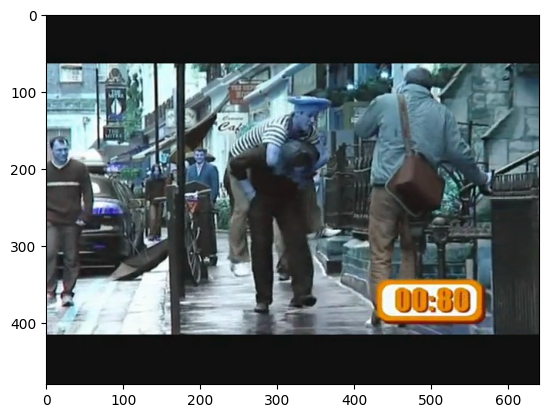

In [ ]:
plt.imshow(img)

In [ ]:
# removing dodgy image
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

# Load dataset

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('dataset_revisi') # dataset configuration (reshape image, dll)

Found 534 files belonging to 5 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator() # convert data (generator) into a numpy iterator (array not dataset)

In [ ]:
# get another batch from the iterator
batch = data_iterator.next()

In [ ]:
batch

(array([[[[134.      , 135.      , 140.      ],
          [134.      , 135.      , 140.      ],
          [135.      , 136.      , 141.      ],
          ...,
          [173.      , 173.      , 181.      ],
          [149.      , 149.      , 157.      ],
          [147.      , 147.      , 155.      ]],
 
         [[134.      , 135.      , 140.      ],
          [134.      , 135.      , 140.      ],
          [135.      , 136.      , 141.      ],
          ...,
          [173.      , 173.      , 181.      ],
          [149.      , 149.      , 157.      ],
          [147.      , 147.      , 155.      ]],
 
         [[134.      , 135.      , 140.      ],
          [134.      , 135.      , 140.      ],
          [135.      , 136.      , 141.      ],
          ...,
          [173.      , 173.      , 181.      ],
          [149.      , 149.      , 157.      ],
          [147.      , 147.      , 155.      ]],
 
         ...,
 
         [[ 18.46875 ,  26.46875 ,  13.46875 ],
          [ 16.406

In [ ]:
# two batch, there's the images and there's tha label
len(batch)

2

In [ ]:
# images represented as numpy arrays
batch[0]

array([[[[1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.35000000e+02, 1.36000000e+02, 1.41000000e+02],
         ...,
         [1.73000000e+02, 1.73000000e+02, 1.81000000e+02],
         [1.49000000e+02, 1.49000000e+02, 1.57000000e+02],
         [1.47000000e+02, 1.47000000e+02, 1.55000000e+02]],

        [[1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.35000000e+02, 1.36000000e+02, 1.41000000e+02],
         ...,
         [1.73000000e+02, 1.73000000e+02, 1.81000000e+02],
         [1.49000000e+02, 1.49000000e+02, 1.57000000e+02],
         [1.47000000e+02, 1.47000000e+02, 1.55000000e+02]],

        [[1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.34000000e+02, 1.35000000e+02, 1.40000000e+02],
         [1.35000000e+02, 1.36000000e+02, 1.41000000e+02],
         ...,
         [1.73000000e+02, 1.73000000e+02, 1.81000000e+02],
         [

In [ ]:
batch[1] #labels represented by numpy arrays, but not sure which label belong to which number

array([4, 2, 2, 1, 3, 3, 3, 2, 2, 3, 0, 2, 0, 2, 3, 4, 4, 2, 3, 3, 3, 0,
       1, 4, 2, 1, 3, 4, 0, 2, 3, 4])

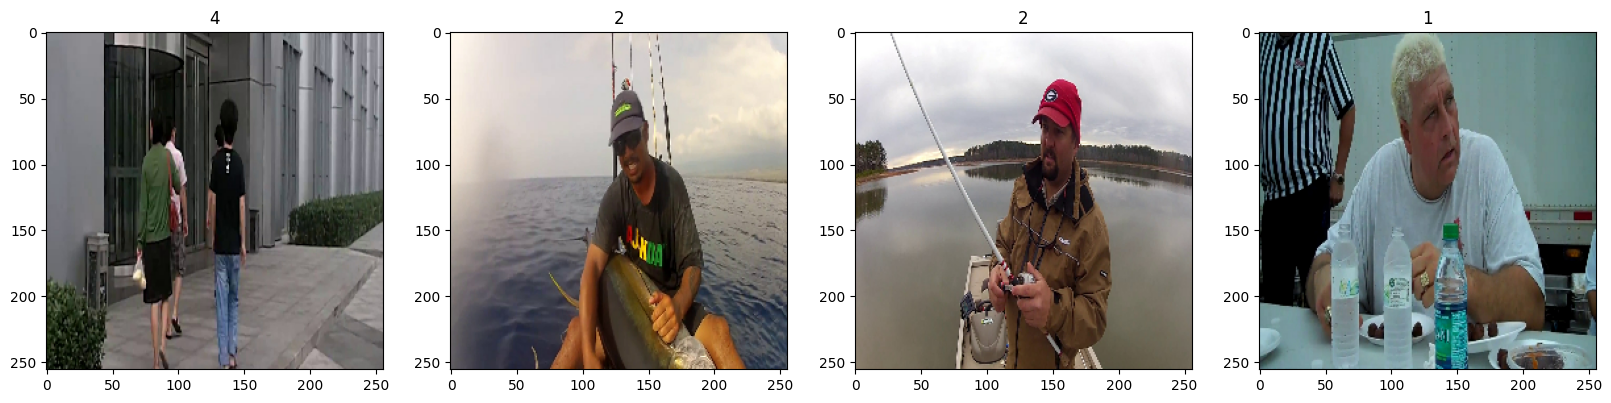

In [ ]:
fig, ax = plt. subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Note: class 0 is Bicycling, class 1 is Eating, class 2 is Fishing, class 3 is Fitball Exercise, and class 4 is Walking

# Preprocess Data


Don't run these code below, or you divided batch[0] by 255 twice

In [ ]:
# scaling image values between 0 to 1
import tensorflow as tf
data = data.map(lambda x, y: (x / 255, y))

num_classes = 5
data = data.map(lambda x, y: (x, tf.one_hot(tf.cast(y, tf.int32), num_classes)))

# Fungsi untuk normalisasi dan one-hot encoding
# def preprocess(x, y):
#     x_normalized = x / 255
#     y_one_hot = tf.keras.utils.to_categorical(y, num_classes=5)
#     return x_normalized, y_one_hot

# # Menggunakan tf.py_function untuk menerapkan fungsi Python pada elemen dataset
# data = data.map(lambda x, y: tf.py_function(func=preprocess, inp=[x, y], Tout=[tf.float32, tf.float32]))


In [ ]:
# Get another batch from the iterator
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

In [ ]:
batch[1]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


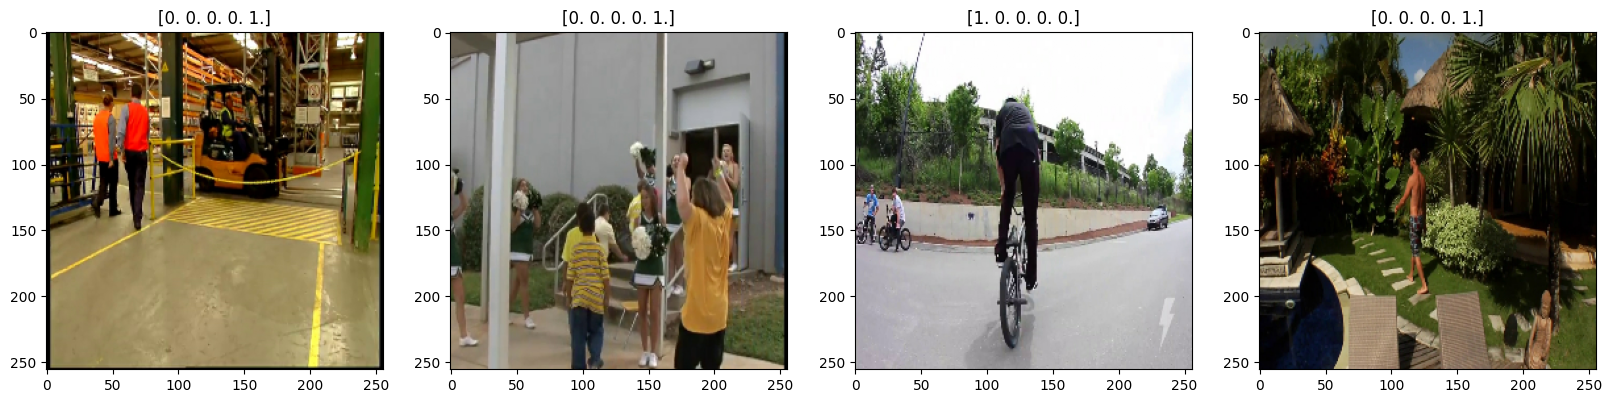

In [ ]:
fig, ax = plt. subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

**Hyperparameter Tuning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Convert the dataset to a numpy array for compatibility with KFold
data_array = list(data.as_numpy_iterator())
data_array = [(x, y) for x, y in data_array]
data_array = np.array(data_array)  # Convert to NumPy array

# Prepare the data for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function for creating the model
def create_model(learning_rate, optimizer):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D())

    model.add(Conv2D(32, (3, 3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Conv2D(16, (3, 3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Perform cross-validation with hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['adam', 'rmsprop', 'sgd']

batch_size = 8

for lr in learning_rates:
    for opt in optimizers:
        cv_scores = []

        try:
          for train_index, val_index in kf.split(data_array):
            train_data = data_array[train_index]
            val_data = data_array[val_index]

            # Define a generator function to yield batches
            def generator(data_array):
                for x, y in data_array:
                    yield x, y

            # Create TensorFlow datasets from generators
            train_data = tf.data.Dataset.from_generator(lambda: generator(train_data), output_signature=(
                tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(5,), dtype=tf.float32)
            ))

            val_data = tf.data.Dataset.from_generator(lambda: generator(val_data), output_signature=(
                tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(5,), dtype=tf.float32)
            ))

            train_data = train_data.batch(batch_size)
            val_data = val_data.batch(batch_size)

            model = create_model(learning_rate=lr, optimizer=opt)

            # Early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

            # Assuming `train_data` and `val_data` are your training and validation datasets
            history = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[early_stopping])

            # Evaluate the model on the validation set
            _, val_accuracy = model.evaluate(val_data)
            cv_scores.append(val_accuracy)

        except Exception as e:
          print(f"Error occurred: {e}")
          traceback.print_exc()

        # Calculate and print the average validation accuracy for this set of hyperparameters
        avg_val_accuracy = sum(cv_scores) / len(cv_scores)
        print(f'Learning Rate: {lr}, Optimizer: {opt}, Avg. Validation Accuracy: {avg_val_accuracy}')


<ipython-input-33-92b12b389ffa>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_array = np.array(data_array)  # Convert to NumPy array


Epoch 1/5


In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import make_scorer, accuracy_score

# # Assume 'X' adalah matriks fitur dan 'y' adalah vektor target
# # Split Data
# X_train, X_test, y_train, y_test = train_test_split(
#     batch[0], batch[1], test_size=0.2, random_state=42, stratify=batch[1]
# )

# # Define the CNN model
# def create_cnn_model(optimizer='adam', kernel_size=(3, 3), pool_size=(2, 2)):
#     model = Sequential()
#     model.add(Conv2D(16, kernel_size, activation='relu', input_shape=(256, 256, 3)))
#     model.add(MaxPooling2D(pool_size))
#     model.add(Conv2D(32, kernel_size, activation='relu'))
#     model.add(MaxPooling2D(pool_size))
#     model.add(Conv2D(16, kernel_size, activation='relu'))
#     model.add(MaxPooling2D(pool_size))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(5, activation='softmax'))

#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Convert labels to one-hot encoding
# y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=5)

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'optimizer': ['adam', 'sgd'],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'epochs': [10, 20],
#     'batch_size': [32, 64]
# }

# # Create KFold cross-validator
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Create CNN model
# cnn_model = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# # Create GridSearchCV object
# custom_scorer = make_scorer(accuracy_score)
# grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid,
#                            scoring=custom_scorer, cv=kfold, n_jobs=-1)
# # grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid,
# #                            scoring='accuracy', cv=kfold, n_jobs=-1)

# # Train model using data
# grid_search.fit(X_train, y_train_one_hot)

# # Save the best model using joblib
# joblib.dump(grid_search.best_estimator_, 'best_cnn_model.joblib')

# # Print best parameters and best accuracy score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

# # Predict using the best model
# best_cnn_model = grid_search.best_estimator_
# y_pred_one_hot = best_cnn_model.predict(X_test)

# # Convert predictions to class labels
# y_pred = tf.argmax(y_pred_one_hot, axis=1).numpy()

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)

# print(classification_report(y_test, y_pred, zero_division=1))

**Split Data**

In [ ]:
len(data)

17

In [ ]:
train_size = int(len(data) * .7) + 1
val_size = int(len(data) * .2) # evaluate our model while we're training
test_size = int(len(data) * .1) + 1

In [ ]:
train_size + val_size + test_size
# this supposed to be equal len(data)

17

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
len(test)

2

# Deep Model

**Build Deep Learning Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
# Model 1
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu')) # 256 number of units used in dense layer
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax')) # sigmoid represents 0 and 1 output

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# adam is tf optimizers
# BinaryCrossentropy using because in this case we're performing a binary classification problem

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Model 2
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu')) # 256 number of units used in dense layer
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax')) # sigmoid represents 0 and 1 output

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
# Model 3
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu')) # 256 number of units used in dense layer
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax')) # sigmoid represents 0 and 1 output

optimizer = SGD(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 16)       

**Train**

Training Model 1

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
# history
hist = model.fit(train, epochs = 16, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/16
12/12 [==============================] - 17s 459ms/step - loss: 1.7094 - accuracy: 0.2474 - val_loss: 1.5811 - val_accuracy: 0.4792
Epoch 2/16
12/12 [==============================] - 11s 775ms/step - loss: 1.4911 - accuracy: 0.3958 - val_loss: 1.3070 - val_accuracy: 0.6146
Epoch 3/16
12/12 [==============================] - 15s 1s/step - loss: 1.2087 - accuracy: 0.5599 - val_loss: 1.0167 - val_accuracy: 0.6875
Epoch 4/16
12/12 [==============================] - 11s 814ms/step - loss: 0.9631 - accuracy: 0.6875 - val_loss: 0.8578 - val_accuracy: 0.6979
Epoch 5/16
12/12 [==============================] - 10s 674ms/step - loss: 0.7591 - accuracy: 0.7266 - val_loss: 0.5822 - val_accuracy: 0.8125
Epoch 6/16
12/12 [==============================] - 11s 615ms/step - loss: 0.6557 - accuracy: 0.7708 - val_loss: 0.4327 - val_accuracy: 0.8854
Epoch 7/16
12/12 [==============================] - 11s 802ms/step - loss: 0.4713 - accuracy: 0.8438 - val_loss: 0.3175 - val_accuracy: 0.9271
Ep

Training Model 2

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 16, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/16
12/12 [==============================] - 11s 554ms/step - loss: 2.9302 - accuracy: 0.1719 - val_loss: 1.6075 - val_accuracy: 0.2188
Epoch 2/16
12/12 [==============================] - 13s 767ms/step - loss: 1.6086 - accuracy: 0.2214 - val_loss: 1.6036 - val_accuracy: 0.2188
Epoch 3/16
12/12 [==============================] - 12s 899ms/step - loss: 1.6070 - accuracy: 0.2083 - val_loss: 1.5939 - val_accuracy: 0.2396
Epoch 4/16
12/12 [==============================] - 15s 1s/step - loss: 1.6076 - accuracy: 0.2214 - val_loss: 1.6049 - val_accuracy: 0.1979
Epoch 5/16
12/12 [==============================] - 15s 1s/step - loss: 1.5999 - accuracy: 0.2057 - val_loss: 1.5963 - val_accuracy: 0.3125
Epoch 6/16
12/12 [==============================] - 15s 1s/step - loss: 1.6088 - accuracy: 0.2266 - val_loss: 1.6051 - val_accuracy: 0.2500
Epoch 7/16
12/12 [==============================] - 15s 1s/step - loss: 1.6111 - accuracy: 0.1927 - val_loss: 1.5962 - val_accuracy: 0.2396
Epoch 8/16


Training Model 3

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 16, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/16
12/12 [==============================] - 11s 622ms/step - loss: 1.6481 - accuracy: 0.1901 - val_loss: 1.6115 - val_accuracy: 0.1562
Epoch 2/16
12/12 [==============================] - 12s 763ms/step - loss: 1.6366 - accuracy: 0.2031 - val_loss: 1.5866 - val_accuracy: 0.2500
Epoch 3/16
12/12 [==============================] - 12s 915ms/step - loss: 1.6082 - accuracy: 0.2552 - val_loss: 1.5990 - val_accuracy: 0.2083
Epoch 4/16
12/12 [==============================] - 10s 688ms/step - loss: 1.6078 - accuracy: 0.1771 - val_loss: 1.5955 - val_accuracy: 0.2188
Epoch 5/16
12/12 [==============================] - 12s 692ms/step - loss: 1.5747 - accuracy: 0.2500 - val_loss: 1.5798 - val_accuracy: 0.2396
Epoch 6/16
12/12 [==============================] - 12s 906ms/step - loss: 1.5926 - accuracy: 0.2214 - val_loss: 1.5589 - val_accuracy: 0.2188
Epoch 7/16
12/12 [==============================] - 15s 1s/step - loss: 1.5864 - accuracy: 0.2448 - val_loss: 1.5475 - val_accuracy: 0.2917
Ep

**Plot Performance**

Plot Performance Model 1

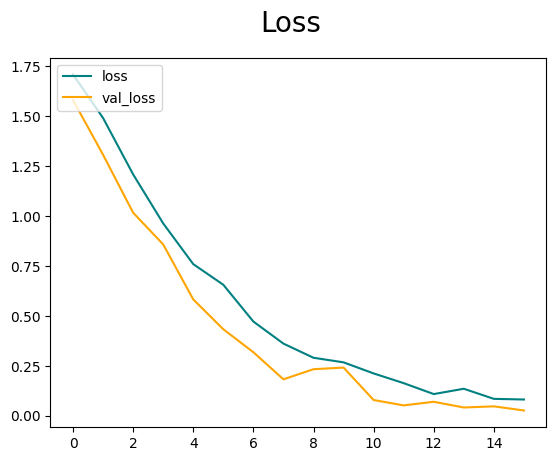

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()
# if your validation loss sort of rising up that is an indication that your model may be overfitting

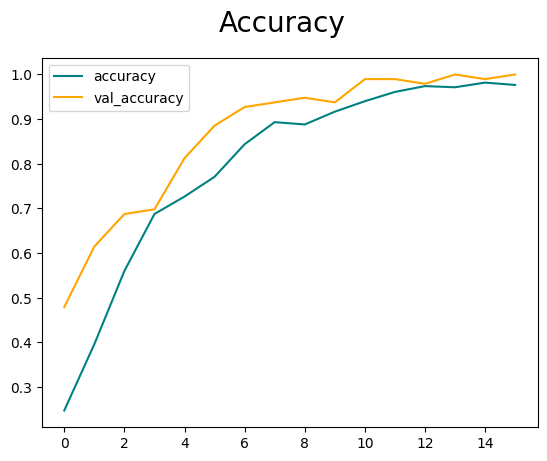

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Plot Performance Model 2

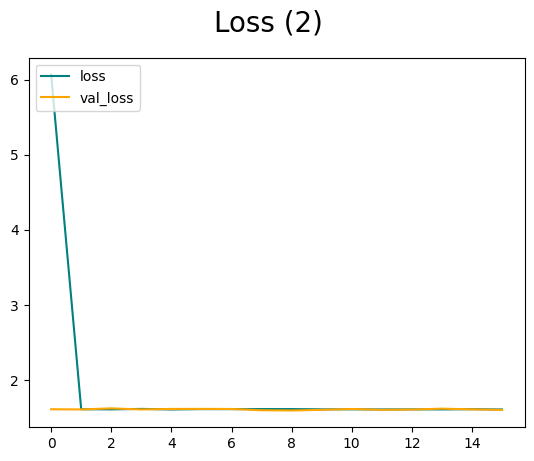

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss (2)', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()
# if your validation loss sort of rising up that is an indication that your model may be overfitting

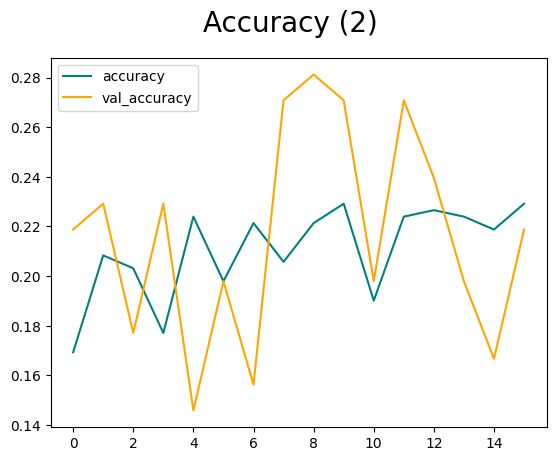

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy (2)', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Plot Performance Model 3

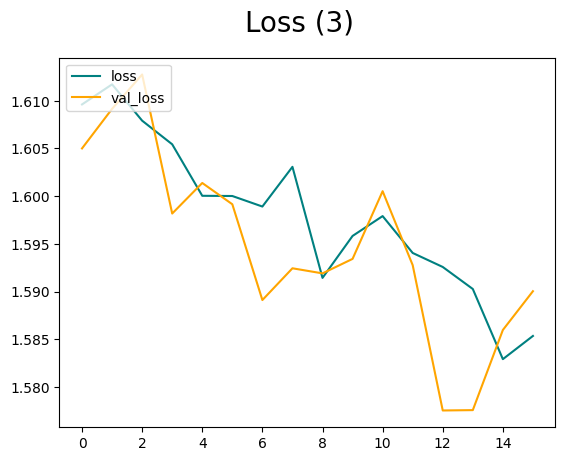

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss (3)', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()
# if your validation loss sort of rising up that is an indication that your model may be overfitting

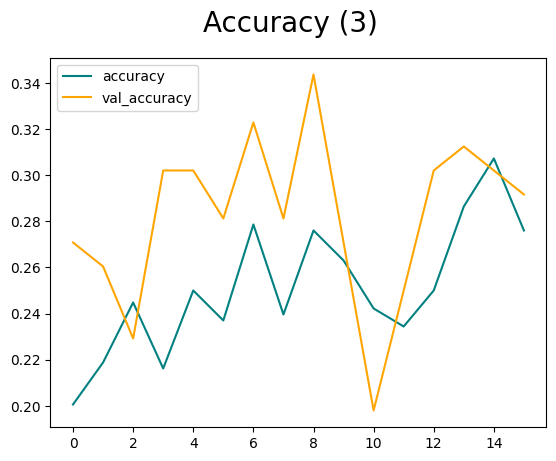

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy (3)', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Maka model terbaik yang digunakan adalah model CNN1 yang menggunakan parameter learning rate: 0.001 dan optimizer: Adam

# Evaluation Performance

**Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re  = Recall()
acc = CategoricalAccuracy()

In [ ]:
len(test)

2

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    # y_one_hot = to_categorical(y, num_classes=5) # menjadikan label numerik menjadi one-hot-encoding untuk testing
    print("Number of samples in batch:", X.shape[0])
    print("Label shape:", y.shape)
    print("Output shape:", model.predict(X).shape)

Number of samples in batch: 32
Label shape: (32, 5)
1/1 [==============================] - 0s 174ms/step
Output shape: (32, 5)
Number of samples in batch: 22
Label shape: (22, 5)
1/1 [==============================] - 0s 496ms/step
Output shape: (22, 5)


In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy}')

Precision: 1.0, Recall: 0.9814814925193787, Accuracy: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Collecting true labels and predicted labels for the test set
true_labels = []
predicted_labels = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert one-hot encoded labels back to integer labels
    true_labels.extend(np.argmax(y, axis=1))
    predicted_labels.extend(np.argmax(yhat, axis=1))

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

1/1 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



1/1 [==============================] - 0s 29ms/step


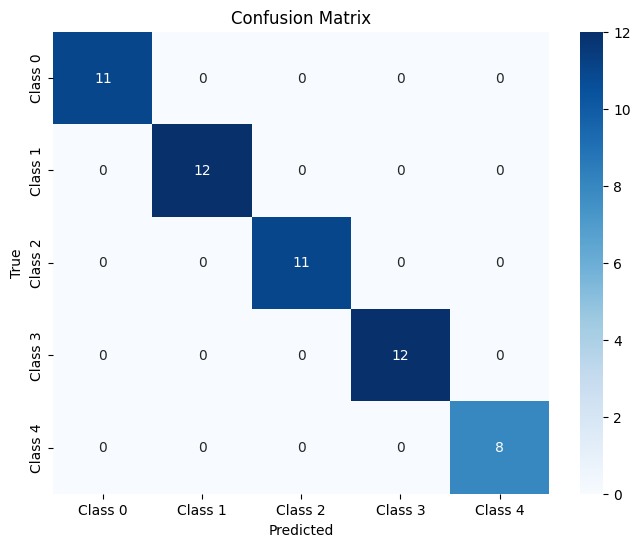

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Inisialisasi list untuk menyimpan prediksi dan label sebenarnya
y_true = []
y_pred = []

# Loop melalui data uji dan prediksi dengan model
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Mengubah one-hot encoded label kembali ke bentuk integer
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(yhat, axis=1))

# Menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Print confusion matrix
# print("Confusion Matrix:")
# print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the Model

Dashboard

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
